https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('~/Desktop/train.csv')
df_test = pd.read_csv('~/Desktop/test.csv')

## 1. EDA

### 1. Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.

In [ ]:
# Descriptive Statistics of the dependent variable
df_train[['SalePrice']].describe()

In [ ]:
# Marginal Distribution of the dependent variable
sns.histplot(df_train['SalePrice'], kde = True, bins=20, stat='probability')
plt.title("Marginal Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Probability Density")
plt.show()

### 2. Investigate missing data and outliers.

In [ ]:
# Missing data
missing_data = pd.DataFrame({'Missing values':(df_train.isna().sum()).sort_values(ascending=False)})
missing_data = missing_data[missing_data['Missing values']> 0]
ax = sns.barplot(x = missing_data.index, y='Missing values', data = missing_data)
ax.bar_label(ax.containers[0], fontsize=6)
plt.title('Missing Values by Feature', pad=20, fontsize=10)
plt.ylabel('Number of Missing Values', fontsize=10)
plt.xticks(rotation=75, ha='center',fontsize=7)
plt.show()

In [ ]:
# Outliers
def find_outliers_iqr(data):
    """Find outliers in a dataset using the 1.5*IQR rule."""

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

outliers_data = pd.DataFrame({'Outliers':df_train.select_dtypes(include=np.number).apply(find_outliers_iqr).apply(len)})
outliers_data = outliers_data[outliers_data['Outliers']> 0].sort_values(by='Outliers',ascending=False)

ax = sns.barplot(x = outliers_data.index, y='Outliers', data = outliers_data)
ax.bar_label(ax.containers[0], fontsize=6)
plt.title('Outliers by Feature', pad=20, fontsize=10)
plt.ylabel('Number of Outliers', fontsize=10)
plt.xticks(rotation=75, ha='center',fontsize=7)
plt.show()

### 3. Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.

In [ ]:
# Corr matrix
abs(df_train.corr(numeric_only=True)['SalePrice']).sort_values(ascending=False).head(4)

In [ ]:
# OverallQual vs SalePrice
sns.regplot(data=df_train, x='OverallQual', y='SalePrice', line_kws={'color': 'r'}, order = 3)
plt.title('OverallQual vs SalePrice')
plt.show()

In [ ]:
# GrLivArea vs SalePrice
sns.regplot(data=df_train, x='GrLivArea', y='SalePrice', line_kws={'color': 'r'})
plt.title('GrLivArea vs SalePrice')
plt.show()

In [ ]:
# GarageCars vs SalePrice
sns.regplot(data=df_train, x='GarageCars', y='SalePrice', line_kws={'color': 'r'})
plt.title('GarageCars vs SalePrice')
plt.show()

### 4. Engage in feature creation by splitting, merging, or otherwise generating a new predictor.

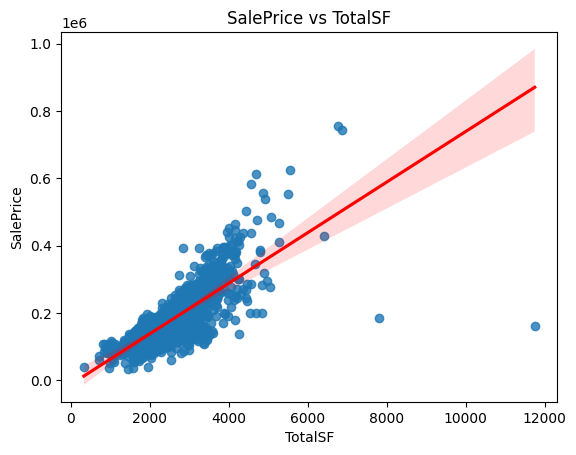

In [3]:
# Creat new feature TotalSF
df_train['TotalSF'] = df_train['GrLivArea'] + df_train['TotalBsmtSF']

# Visualize the relationship between TotalSF and SalePrice
sns.regplot(data = df_train, x='TotalSF', y='SalePrice', line_kws={'color': 'r'})
plt.title("SalePrice vs TotalSF")
plt.show()

### 5. Using the dependent variable, perform both min-max and standard scaling in Python.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
minmax = mm_scaler.fit_transform(df_train[['SalePrice']]).flatten()


In [ ]:
from sklearn.preprocessing import StandardScaler
sd_scaler = StandardScaler()
standard = sd_scaler.fit_transform(df_train[['SalePrice']]).flatten()

In [ ]:
scaler_data = pd.DataFrame({
    'SalePrice':df_train['SalePrice'],
    'Minmax':minmax,
    'Standard':standard
})

scaler_data

In [4]:
df_train = df_train.drop(['Id','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                          'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageYrBlt', 
                          'GarageCars', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 
                          'YrSold', 'BsmtFinSF1', 'OverallCond', 'MSSubClass'], axis=1)

## Feature note

Continuous variable: 
- LotFrontage (C):
    - Corr w/ target = 0.351799
    - Corr w/ others = LotArea (0.426095), TotalSF (0.462352), GarageArea (0.344997), TotalBsmtSF (0.392075), 1stFlrSF(0.457181), BsmtFinSF1 (0.233633)
- LotArea (C w/LotFrontage):
    - Corr w/ target = 0.263843
    - Corr w/ others = LotFrontage (0.426095)
- YearBuilt (C):
    - Corr w/ target = 0.522897
    - Corr w/ others = TotalBsmtSF (0.391452), GarageArea (0.478954), TotalSF (0.335488)
- YearRemodAdd (C):
    - Corr w/ target = 0.507101
    - Corr w/ others = GarageYrBlt (0.642277)
- MasVnrArea (Y):
    - Corr w/ target = 0.477493
    - Corr w/ others = GrLivArea (0.390857), TotalSF (0.443391) 
- BsmtFinSF1 (N): 
    - Corr w/ target = 0.386420
    - Corr w/ others = TotalBsmtSF (0.522396), 1stFlrSF (0.445863), TotalSF (0.411084)
- BsmtFinSF2 (N):
    - Corr w/ target = -0.011378
    - Corr w/ others = NA
- BsmtUnfSF (N): 
    - Corr w/ target = 0.214479
    - Corr w/ others = NA
- TotalBsmtSF (N): 
    - Corr w/ target = 0.613581
    - Corr w/ others = LotFrontage (0.392075), OverallQual (0.537808), 1stFlrSF (0.819530), GarageArea (0.486665)
- 1stFlrSF (N): 
    - Corr w/ target = 0.605852
    - Corr w/ others = LotFrontage (0.457181), OverallQual (0.476224), TotalBsmtSF (0.819530), GrLivArea (0.566024), GarageArea (0.489782), TotalSF (0.797678)
- 2ndFlrSF (N):
    - Corr w/ target = 0.319334
    - Corr w/ others = GrLivArea (0.687501)
- LowQualFinSF (N): 
    - Corr w/ target = -0.025606
    - Corr w/ others = NA
- GrLivArea (N):
    - Corr w/ target = 0.708624
    - Corr w/ others = All
- BsmtFullBath (N):
    - Corr w/ target = 0.227122
    - Corr w/ others = NA
- BsmtHalfBath (N):
    - Corr w/ target = -0.016844
    - Corr w/ others = NA
- FullBath (Y):
    - Corr w/ target = 0.560664
    - Corr w/ others = TotalSF (0.574403), TotRmsAbvGrd (0.554784)
- HalfBath (N):
    - Corr w/ target = 0.284108
    - Corr w/ others = NA
- BedroomAbvGr (N): 
    - Corr w/ target = 0.168213
    - Corr w/ others = NA
- KitchenAbvGr (N): 
    - Corr w/ target = -0.135907
    - Corr w/ others = NA
- TotRmsAbvGrd (Y):
    - Corr w/ target = 0.533723
    - Corr w/ others = TotalSF (0.678802)
- Fireplaces (Y):
    - Corr w/ target = 0.466929
    - Corr w/ others = TotalSF (0.475416)
- GarageYrBlt (N):
    - Corr w/ target = 0.486362
    - Corr w/ others = GarageArea (0.564567)
- GarageCars (N):
    - Corr w/ target = 0.640409
    - Corr w/ others = All
- GarageArea (Y):
    - Corr w/ target = 0.623431
    - Corr w/ others = All
- WoodDeckSF (Y):
    - Corr w/ target = 0.324413
    - Corr w/ others = TotalSF (0.281459) 
- OpenPorchSF (Y):
    - Corr w/ target = 0.315856
    - Corr w/ others = TotalSF (0.342402)
- EnclosedPorch (N):
    - Corr w/ target = -0.128578
    - Corr w/ others = NA
- 3SsnPorch (N):
    - Corr w/ target = 0.044584
    - Corr w/ others = NA
- ScreenPorch (N):
    - Corr w/ target = 0.111447
    - Corr w/ others = NA
- PoolArea (N):
    - Corr w/ target = 0.092404
    - Corr w/ others = NA
- MiscVal (N):
    - Corr w/ target = -0.021190
    - Corr w/ others = NA
- MoSold (N):
    - Corr w/ target = 0.046432
    - Corr w/ others = NA
- YrSold (N):
    - Corr w/ target = -0.028923
    - Corr w/ others =  NA
- TotalSF (N): 
    - Corr w/ target = 0.778959
    - Corr w/ others = All



Discrete Variable:
- MSSubClass (N): 
    - Corr w/ target = -0.084284
    - Corr w/ others = NA
- MSZoning: 
- Street: 
- Alley: 
- LotShape:
- LandContour:
- Utilities:
- LotConfig:
- LandSlope:
- Neighborhood:
- Condition1:
- Condition2:
- BldgType:
- HouseStyle:
- OverallQual (Y):
    - Corr w/ target = 0.790982
    - Corr w/ others = MasVnrArea (0.411876), YearBuilt (0.572323), YearRemodAdd (0.550684), BsmtFinSF1 (0.239666), TotalBsmtSF (0.537808), 1stFlrSF (0.476224), GrLivArea (0.593007), TotalSF (0.664830)
- OverallCond (N):
    - Corr w/ target = -0.077856
    - Corr w/ others = NA
- RoofStyle:
- RoofMatl:
- Exterior1st:
- Exterior2nd:
- MasVnrType:
- ExterQual:
- ExterCond:
- Foundation:
- BsmtQual:
- BsmtCond:
- BsmtExposure:
- BsmtFinType1:
- BsmtFinType2:
- Heating:
- HeatingQC: 
- CentralAir:
- Electrical:
- KitchenQual:
- Functional:
- FireplaceQu:
- GarageType:
- GarageFinish:
- GarageQual:
- GarageCond:
- PavedDrive:
- PoolQC:
- Fence:
- MiscFeature:
- SaleType:
- SaleCondition: 


## Model

In [7]:
df_train = df_train.select_dtypes(include=np.number)
df_train = df_train.dropna()

In [8]:
# Compute IQR and bounds
Q1 = df_train.quantile(0.25, numeric_only=True)  # First quartile
Q3 = df_train.quantile(0.75, numeric_only=True)  # Third quartile
IQR = Q3 - Q1           # Interquartile range

lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

# Find rows where any column value is outside the 2*IQR bounds
mask = ((df_train < lower_bound) | (df_train > upper_bound)).any(axis=1)
df_train = df_train.drop(df_train[mask].index, axis=0)

In [9]:
df_train['Lot'] = (0.57 * df_train['LotFrontage']) + (0.42 * df_train['LotArea'])
df_train['Year'] = (df_train['YearBuilt'] + df_train['YearRemodAdd'])/2

df_train = df_train.drop(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd'], axis=1)

In [11]:
df_train

,OverallQual,MasVnrArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,TotalSF,Lot,Year
0,7,196.0,2,8,0,548,0,61,208500,2566,3586.05,2003.0
1,6,0.0,2,6,1,460,298,0,181500,2524,4077.60,1976.0
2,7,162.0,2,6,1,608,0,42,223500,2706,4763.76,2001.5
3,7,0.0,1,7,1,642,0,35,140000,2473,4045.20,1942.5
4,8,350.0,2,9,1,836,192,84,250000,3343,6037.08,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1454,7,0.0,2,6,0,400,0,113,185000,2442,3185.34,2004.5
1455,6,0.0,2,7,1,460,0,40,175000,2600,3360.48,1999.5
1456,6,119.0,2,7,2,500,349,0,210000,3615,5581.95,1983.0
1457,7,0.0,2,9,2,252,0,60,266500,3492,3835.26,1973.5


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

stdsclr = StandardScaler()

X = stdsclr.fit_transform(df_train.drop('SalePrice', axis = 1))
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(X) 
y = np.ravel(stdsclr.fit_transform(df_train[['SalePrice']]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


rf_model = RandomForestRegressor(n_estimators=100, random_state=33)

# Train the Model
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")



Mean Squared Error: 0.371551499199868
R^2 Score: 0.8686329772413018


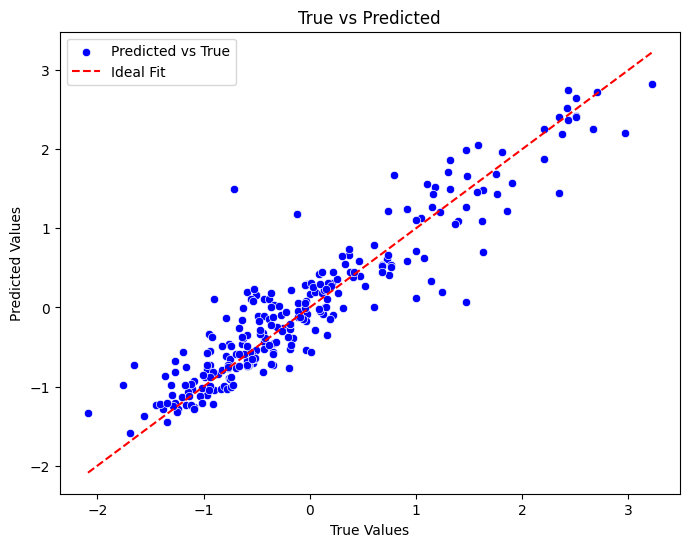

In [23]:
# Plot True vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted vs True')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title('True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

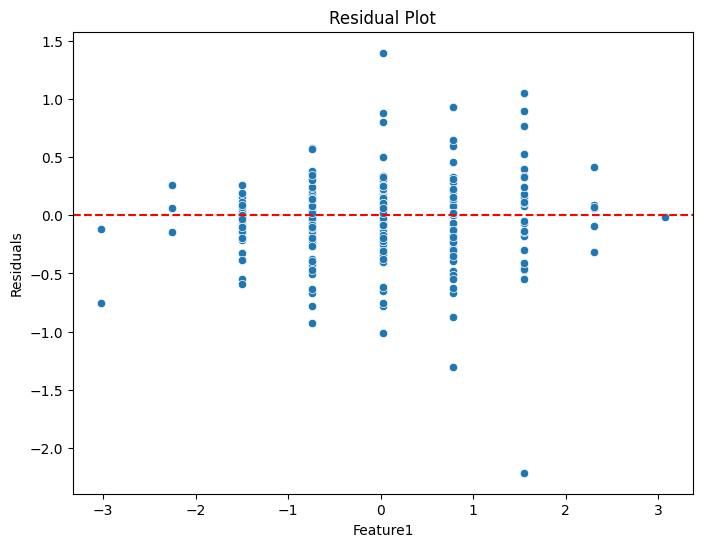

In [29]:
# Residuals
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 0], y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Feature1')
plt.ylabel('Residuals')
plt.show()